# ML 512 Project Choice 1 - Explore methods

In [5]:
import pandas as pd
import numpy as np
import json
import collections
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import collections
plt.style.use('ggplot')

In [6]:
movie_df = pd.read_csv('tmdb_movies_data.csv')

In [7]:
movie_df.shape

(10866, 21)

In [8]:
movie_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [10]:
movie_df.budget.describe()

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [11]:
movie_df = movie_df.drop(movie_df[movie_df.budget == 0].index)

In [12]:
movie_df.budget.describe()

count    5.170000e+03
mean     3.073943e+07
std      3.890065e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [13]:
movie_df.shape

(5170, 21)

In [14]:
movie_df.sample(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7706,15728,tt0433350,0.39628,500000,220151,Boy Culture,Jonathon Trent|Derek Magyar|George Jonson|Patr...,NaN,Q. Allan Brocka,Sex pays. Love costs.,...,A successful male escort describes in a series...,88,Drama|Romance,TLA Releasing|Boy Culture LLC,1/31/2007,18,5.4,2007,525834.2913,231525.8901


### Genre  Popularity Vs Decade

In [15]:
def get_decade_by_year(year):
    decade = year - (year%10)
    decade_plus_10 = decade +10
    decade_as_str = str(decade)+'-'+ str(decade_plus_10)
    return decade_as_str

In [16]:
get_decade_by_year(1951)

'1950-1960'

In [17]:
year_of_release = []
decade_of_release = []
month_of_release = []
for x in range(len(movie_df)):
    year = int(movie_df.iloc[x]['release_date'][-4:])
    month = int(movie_df.iloc[x]['release_date'].split('/')[0])
    year_of_release.append(year) 
    decade_of_release.append(get_decade_by_year(year))
    month_of_release.append(month)
movie_df['year_of_release'] = year_of_release
movie_df['decade_of_release'] = decade_of_release
movie_df['month_of_release'] = month_of_release

In [18]:
sample_cols = ['month_of_release','year_of_release','release_date','decade_of_release']
movie_df[sample_cols].sample(5)

,month_of_release,year_of_release,release_date,decade_of_release
4684,8,2012,8/1/2012,2010-2020
8191,12,1995,12/13/1995,1990-2000
6572,6,2006,6/22/2006,2000-2010
6977,5,2004,5/19/2004,2000-2010
5176,7,2003,7/11/2003,2000-2010


In [19]:
genre_by_decade = collections.OrderedDict()
for i in range(len(movie_df)):
    decade = movie_df.iloc[i]['decade_of_release']
    if decade not in genre_by_decade:
        genre_by_decade[decade] = {}
    if type(movie_df.iloc[i]['genres'])==str:
        genres_as_list = movie_df.iloc[i]['genres'].split('|')
        for each_genre_in_movie in genres_as_list:
            if each_genre_in_movie not in genre_by_decade[decade]:
                genre_by_decade[decade][each_genre_in_movie] =1
            else:
                genre_by_decade[decade][each_genre_in_movie]+=1

In [20]:
df = pd.DataFrame(genre_by_decade)
cols= sorted(list(df.columns))
df[cols]

,1960-1970,1970-1980,1980-1990,1990-2000,2000-2010,2010-2020
Action,30.0,55.0,140.0,284,509,411
Adventure,33.0,40.0,102.0,164,339,228
Science Fiction,11.0,42.0,103.0,140,224,182
Thriller,26.0,63.0,140.0,330,619,464
Fantasy,6.0,13.0,67.0,110,189,123
Crime,17.0,36.0,78.0,183,307,203
Western,10.0,7.0,6.0,14,22,15
Drama,62.0,94.0,190.0,454,878,639
Family,13.0,13.0,44.0,111,219,123
Animation,4.0,10.0,14.0,31,109,92


In [21]:
columns = list(df.columns)
for column in columns:
    df[column] = 100*df[column] /  df[column].sum()
cols= sorted(list(df.columns))
df[cols]

,1960-1970,1970-1980,1980-1990,1990-2000,2000-2010,2010-2020
Action,9.009009,10.456274,10.144928,10.696798,9.916228,11.483655
Adventure,9.909910,7.604563,7.391304,6.177024,6.604325,6.370495
Science Fiction,3.303303,7.984791,7.463768,5.273070,4.363920,5.085219
Thriller,7.807808,11.977186,10.144928,12.429379,12.059225,12.964515
Fantasy,1.801802,2.471483,4.855072,4.143126,3.682057,3.436714
Crime,5.105105,6.844106,5.652174,6.892655,5.980908,5.671975
Western,3.003003,1.330798,0.434783,0.527307,0.428599,0.419111
Drama,18.618619,17.870722,13.768116,17.099812,17.105007,17.854149
Family,3.903904,2.471483,3.188406,4.180791,4.266511,3.436714
Animation,1.201201,1.901141,1.014493,1.167608,2.123515,2.570550


In [22]:
df

,2010-2020,1970-1980,2000-2010,1990-2000,1980-1990,1960-1970
Action,11.483655,10.456274,9.916228,10.696798,10.144928,9.009009
Adventure,6.370495,7.604563,6.604325,6.177024,7.391304,9.909910
Science Fiction,5.085219,7.984791,4.363920,5.273070,7.463768,3.303303
Thriller,12.964515,11.977186,12.059225,12.429379,10.144928,7.807808
Fantasy,3.436714,2.471483,3.682057,4.143126,4.855072,1.801802
Crime,5.671975,6.844106,5.980908,6.892655,5.652174,5.105105
Western,0.419111,1.330798,0.428599,0.527307,0.434783,3.003003
Drama,17.854149,17.870722,17.105007,17.099812,13.768116,18.618619
Family,3.436714,2.471483,4.266511,4.180791,3.188406,3.903904
Animation,2.570550,1.901141,2.123515,1.167608,1.014493,1.201201


In [23]:
df.T.columns

Index(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery',
       'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary',
       'TV Movie', 'Foreign'],
      dtype='object')

In [24]:
a =df.T.sort_index()

In [25]:
a.columns

Index(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery',
       'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary',
       'TV Movie', 'Foreign'],
      dtype='object')

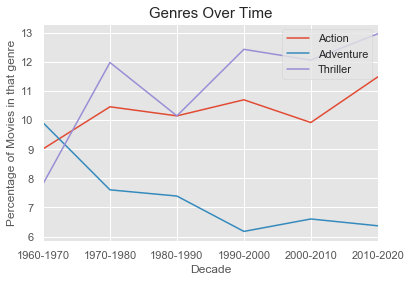

In [26]:
## plt.figure(figsize=(10,7))
cols =['Action','Adventure','Thriller']
a[cols].plot()
plt.xlabel("Decade",fontsize = 12)
plt.ylabel("Percentage of Movies in that genre",fontsize=12)
plt.title("Genres Over Time",fontsize = 15)
plt.show()

In [27]:
df.sum(axis=0)

2010-2020    100.0
1970-1980    100.0
2000-2010    100.0
1990-2000    100.0
1980-1990    100.0
1960-1970    100.0
dtype: float64

In [28]:
df.nlargest(1,'1960-1970')

,2010-2020,1970-1980,2000-2010,1990-2000,1980-1990,1960-1970
Drama,17.854149,17.870722,17.105007,17.099812,13.768116,18.618619


In [29]:
movie_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'year_of_release', 'decade_of_release',
       'month_of_release'],
      dtype='object')

In [30]:
genre_score = []
curr_genre_score = []
for i in range(len(movie_df)):
    if type(movie_df.iloc[i]['genres'])==str:
        each_movie_genre_score =0
        each_movie_curr_genre_score = 0
        decade_of_release = movie_df.iloc[i]['decade_of_release']
        genres_as_list = movie_df.iloc[i]['genres'].split('|')
        for each_genre_in_movie in genres_as_list:
            each_movie_genre_score+=df[decade_of_release][each_genre_in_movie]
            each_movie_curr_genre_score+=df['2010-2020'][each_genre_in_movie]
    else:
        each_movie_genre_score = 0
        each_movie_curr_genre_score =0
    curr_genre_score.append(each_movie_curr_genre_score)
    genre_score.append(each_movie_genre_score)
movie_df['genre_score'] = genre_score
movie_df['curr_genre_score'] = curr_genre_score

In [31]:
movie_df['curr_genre_score'].describe()

count    5170.000000
mean       25.072605
std        10.895798
min         0.000000
25%        17.854149
50%        23.526125
75%        33.556859
max        60.938810
Name: curr_genre_score, dtype: float64

In [32]:
movie_df['genre_score'].describe()

count    5170.000000
mean       24.962696
std        10.640711
min         0.000000
25%        17.602682
50%        23.749651
75%        32.768362
max        60.677966
Name: genre_score, dtype: float64

In [33]:
# Number of movies by decade
df.sum(axis = 0, skipna = True) 

2010-2020    100.0
1970-1980    100.0
2000-2010    100.0
1990-2000    100.0
1980-1990    100.0
1960-1970    100.0
dtype: float64

# Inflation Vs Profit

In [34]:
inflation_df = pd.read_csv('infla.csv')
inflation_df['DATE'] = pd.to_datetime(inflation_df['DATE'])
inflation_df["year"] = inflation_df["DATE"].dt.year
inflation_df["month"] = inflation_df["DATE"].dt.month

In [35]:
inflation_df.sample(3)

,DATE,CPIAUCNS_NBD19130101,year,month
596,1965-09-01,12.27919,1965,9
511,1958-08-01,11.23002,1958,8
1140,2011-01-01,85.57467,2011,1


In [36]:
movie_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'year_of_release', 'decade_of_release',
       'month_of_release', 'genre_score', 'curr_genre_score'],
      dtype='object')

In [37]:
inflated_budget =[]
inflated_revenue = []
inflated_profit = []

for i in range(len(movie_df)):
    cpi = inflation_df.loc[inflation_df.year == movie_df.iloc[i].year_of_release][inflation_df.month == movie_df.iloc[i].month_of_release]['CPIAUCNS_NBD19130101'].item()
    inflated_budget.append(movie_df.iloc[i].budget/cpi)
    inflated_revenue.append(movie_df.iloc[i].revenue/cpi)

movie_df['inflated_budget'] = inflated_budget
movie_df['inflated_revenue'] = inflated_revenue
movie_df['inflated_profit'] = movie_df['inflated_revenue'] -movie_df['inflated_budget']

/Users/mvsnbharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/mvsnbharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  


In [38]:
cols =['inflated_budget','inflated_revenue','inflated_profit']
movie_df[cols].sample(3)

,inflated_budget,inflated_revenue,inflated_profit
1491,2.384666e+05,6.213233e+04,-1.763343e+05
2008,1.179523e+06,3.401128e+06,2.221605e+06
4189,9.467578e+05,3.383665e+06,2.436907e+06


# Length Vs Decade

In [39]:
movie_df.runtime.describe()

count    5170.000000
mean      107.093230
std        22.808798
min         0.000000
25%        93.000000
50%       103.000000
75%       117.000000
max       540.000000
Name: runtime, dtype: float64

In [40]:
# cat1 = [0-90]
# cat2 = [91-120]
# cat3 = [>120]

In [41]:
def get_category_by_length(duration):
    if duration>=0 and duration <90:
        return "Less (dur)"
    elif duration >=90 and duration<120:
        return "Med (dur)"
    else:
        return "Long (dur)"

In [42]:
duration_by_decade = collections.OrderedDict()
for i in range(len(movie_df)):
    decade = movie_df.iloc[i]['decade_of_release']
    if decade not in duration_by_decade:
        duration_by_decade[decade] = {}
    movie_duration_category = get_category_by_length(movie_df.iloc[i]['runtime'])
    if movie_duration_category not in duration_by_decade[decade]:
        duration_by_decade[decade][movie_duration_category] =1
    else:
        duration_by_decade[decade][movie_duration_category]+=1

In [43]:
df = pd.DataFrame(duration_by_decade)
cols= sorted(list(df.columns))
df[cols]

,1960-1970,1970-1980,1980-1990,1990-2000,2000-2010,2010-2020
Long (dur),63,67,89,256,390,258
Med (dur),41,109,343,579,1258,993
Less (dur),20,27,74,114,267,222


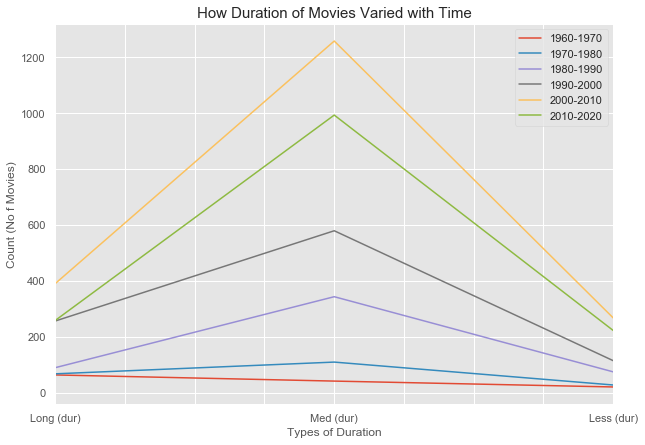

In [44]:
plt.figure(figsize=(10,7))
ax = plt.gca()

df.plot(kind='line',y='1960-1970',ax=ax)
df.plot(kind='line',y='1970-1980',ax=ax)
df.plot(kind='line',y='1980-1990',ax=ax)
df.plot(kind='line',y='1990-2000',ax=ax)
df.plot(kind='line',y='2000-2010',ax=ax)
df.plot(kind='line',y='2010-2020',ax=ax)

plt.title("How Duration of Movies Varied with Time",fontsize=15)
plt.xlabel("Types of Duration",fontsize=12)
plt.ylabel("Count (No f Movies)",fontsize=12)

plt.show()

In [45]:
df_with_dur_scores = df.copy()
columns = list(df.columns)
for column in columns:
    df_with_dur_scores[column] = 100*df_with_dur_scores[column] /  df_with_dur_scores[column].sum()
cols= sorted(list(df.columns))
df_with_dur_scores[cols]

,1960-1970,1970-1980,1980-1990,1990-2000,2000-2010,2010-2020
Long (dur),50.806452,33.004926,17.588933,26.975764,20.365535,17.515275
Med (dur),33.064516,53.694581,67.786561,61.011591,65.691906,67.413442
Less (dur),16.129032,13.300493,14.624506,12.012645,13.942559,15.071283


In [46]:
dur_score = []
for i in range(len(movie_df)):
    decade_of_release = movie_df.iloc[i]['decade_of_release']
    d_score = df_with_dur_scores[decade_of_release][get_category_by_length(movie_df.iloc[i]['runtime'])]
    dur_score.append(d_score)
movie_df['dur_score'] = dur_score

In [47]:
movie_df['dur_score'].sample(2)

81      15.071283
4423    67.413442
Name: dur_score, dtype: float64

In [48]:
directors_list = pd.read_csv('directors_list.csv', encoding='latin-1')
movie_df_dirNew = pd.merge(movie_df,directors_list,left_on='director',right_on='Name', how='left') 

In [49]:
movie_df_dirNew['Description'].isna().sum()

movie_df_dirNew['cast'] = movie_df_dirNew['cast'].astype('str')
actors_df = pd.read_csv('actors_list.csv', encoding='latin-1')
actress_df = pd.read_csv('actress_list.csv', encoding='latin-1')
actress_df = actress_df.drop(['Position', 'Const', 'Created', 'Modified','Known For', 'Birth Date'], axis=1)
actors_df = actors_df.drop(['Position', 'Const', 'Created', 'Modified','Known For', 'Birth Date'], axis=1)
cast_df = pd.concat([actors_df, actress_df],axis=0)
cast_df['Description'] = cast_df['Description'].apply(pd.to_numeric)
cast_df_new = dict(zip(cast_df.Name, cast_df.Description))
movie_df_dirNew['cast_points'] = 0

In [50]:
l = []
for index, row in movie_df_dirNew.iterrows():
    s = row['cast']
    x= s.split('|')
    if len(x)>3:
        x=x[:3]
    count = 0
    sum =0
    for i in x:
        if i in cast_df_new:
            sum = sum + int(cast_df_new.get(i))
        else:
            sum = sum + 0
    l.append(sum)

In [51]:
movie_df_dirNew['cast_points'] = pd.Series(l)

movie_df_dirNew['cast_points'].isnull().sum()

companies_df = pd.read_csv('production_companies_data.csv', encoding='latin-1')

companies_df['score'] = companies_df['count']+(companies_df['domestic']/10000000)+(companies_df['worldwide']/10000000)

mydict_prod = dict(zip(companies_df.Company_name, companies_df.score))
movie_df_dirNew['production_points'] = 0
movie_df_dirNew['production_companies'] = movie_df_dirNew['production_companies'].astype('str')

In [52]:
l = []
for index, row in movie_df_dirNew.iterrows():
    s = row['production_companies']
    x=s.split('|')
    sum =0
    for i in x:
        if i in mydict_prod:
            sum = sum + mydict_prod.get(i)
    else:
        sum = sum + 0
    l.append(sum)
    
movie_df_dirNew['production_points'] = pd.Series(l)
movie_df_dirNew['production_points']

0       4693.446534
1          0.000000
2          0.000000
3       1943.631948
4       2473.997248
           ...     
5191       0.000000
5192       0.000000
5193       0.000000
5194    6066.473052
5195       0.000000
Name: production_points, Length: 5196, dtype: float64

Oscar data

In [53]:
awards_df = pd.read_csv('awards.csv', encoding='latin-1')

In [54]:
awards_df.columns

Index(['Year', 'Ceremony', 'Award', 'Winner', 'Unnamed: 4', 'Name', 'value'], dtype='object')

In [55]:
awards_df['Winner'].fillna(0)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9959    0.0
9960    0.0
9961    1.0
9962    1.0
9963    0.0
Name: Winner, Length: 9964, dtype: float64

In [56]:
awards_df_new = awards_df.groupby('Name').agg({'Winner':'sum'})

In [57]:
awards_df_new.shape

(6363, 1)

In [58]:
movie_df_dirNew.shape

(5196, 36)

In [59]:
movie_df_dirNew=pd.merge(movie_df_dirNew,awards_df_new,on='Name', how='left') 

In [60]:
movie_df_dirNew.shape

(5196, 37)

In [61]:
movie_df_dirNew['Winner'].isna().sum()

4256

In [62]:
movie_df_dirNew['Winner'].fillna(-1,inplace=True)

In [63]:
movie_df_dirNew.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'year_of_release', 'decade_of_release',
       'month_of_release', 'genre_score', 'curr_genre_score',
       'inflated_budget', 'inflated_revenue', 'inflated_profit', 'dur_score',
       'Position', 'Description', 'Name', 's', 'cast_points',
       'production_points', 'Winner'],
      dtype='object')

In [64]:
df_endurance = movie_df_dirNew.copy()

In [65]:
cols = ['budget_adj','genre_score','dur_score']
df_old = movie_df_dirNew[cols]
df_old.sample(3)


,budget_adj,genre_score,dur_score
3811,1.469329e+07,19.927536,67.786561
3459,2.308891e+07,18.273914,20.365535
1379,2.025573e+06,20.358465,65.691906


In [66]:
from sklearn import preprocessing

In [67]:
df_scaler = df_old.copy()
ss = preprocessing.MinMaxScaler()
df_scaler = pd.DataFrame(ss.fit_transform(df_old))
columnNames = df_old.columns.to_list()
df_scaler.columns = columnNames
df_scaler.describe()

,budget_adj,genre_score,dur_score
count,5196.000000,5196.000000,5196.000000
mean,0.086995,0.411507,0.658534
std,0.098851,0.175217,0.401399
min,0.000000,0.000000,0.000000
25%,0.019064,0.290100,0.149763
50%,0.053618,0.391405,0.962444
75%,0.118224,0.540037,0.993310
max,1.000000,1.000000,1.000000


In [68]:
weight_scale={
    "budget_adj"     : 6, 
    "genre_score"    : 3,
    "dur_score"      : 1, 
}
for k,v in weight_scale.items():
    df_scaler[k] = df_scaler[k] * v
df_endurance['old_pop_score'] = np.sqrt(np.sum(np.square(df_scaler), axis=1))

In [69]:
df_endurance.old_pop_score.describe()

count    5196.000000
mean        1.640155
std         0.573735
min         0.015016
25%         1.267272
50%         1.564290
75%         2.020677
max         6.318676
Name: old_pop_score, dtype: float64

In [70]:
x = df_endurance[['old_pop_score']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized.columns = ['old_pop_score']
df_endurance['old_pop_score'] = df_normalized['old_pop_score']*10

In [71]:
df_endurance.old_pop_score.describe()

count    5196.000000
mean        2.578089
std         0.910161
min         0.000000
25%         1.986554
50%         2.457737
75%         3.181741
max        10.000000
Name: old_pop_score, dtype: float64

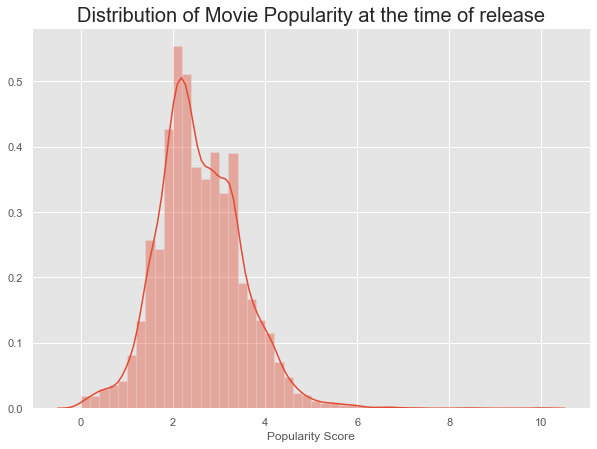

In [72]:
plt.figure(figsize=(10,7))
sns.distplot(df_endurance.old_pop_score)
plt.xlabel("Popularity Score",fontsize = 12)
plt.title("Distribution of Movie Popularity at the time of release",fontsize = 20)
plt.show()

In [73]:
cols = ['vote_average','curr_genre_score','cast_points','production_points','inflated_profit']
df_new = movie_df_dirNew[cols]
df_new.sample(4)

,vote_average,curr_genre_score,cast_points,production_points,inflated_profit
1413,6.0,12.964515,3697,0.000000,-2.898742e+04
3499,5.8,23.749651,33028,0.000000,1.156134e+05
2451,6.9,25.677564,64611,6379.980627,1.300685e+06
3761,7.1,23.526125,0,0.000000,-1.448865e+04


In [74]:
df_scaler_new_score = df_new.copy()
ss = preprocessing.MinMaxScaler()
df_scaler_new_score = pd.DataFrame(ss.fit_transform(df_new))
columnNames = df_new.columns.to_list()
df_scaler_new_score.columns = columnNames

In [75]:
df_scaler_new_score.production_points.describe()

count    5196.000000
mean        0.137551
std         0.188650
min         0.000000
25%         0.000000
50%         0.024126
75%         0.284298
max         1.000000
Name: production_points, dtype: float64

In [76]:
df_scaler_new_score.sample(2)

,vote_average,curr_genre_score,cast_points,production_points,inflated_profit
1526,0.73913,0.341128,0.000000,0.489577,0.191323
1314,0.73913,0.389729,0.092765,0.410386,0.151273


In [77]:
weight_scale={
    "vote_average" : 30,
    "curr_genre_score": 15,
    "cast_points": 15,
    "production_points": 10,
    "inflated_profit"    : 30
}
for k,v in weight_scale.items():
    df_scaler_new_score[k] = df_scaler_new_score[k] * v
df_endurance['curr_pop'] = np.sqrt(np.sum(np.square(df_scaler_new_score), axis=1))

In [78]:
df_endurance.curr_pop.describe()

count    5196.000000
mean       21.589093
std         3.899382
min         4.113262
25%        19.188923
50%        21.820943
75%        24.176097
max        41.599555
Name: curr_pop, dtype: float64

In [79]:
x = df_endurance[['curr_pop']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized.columns = ['curr_pop']
df_endurance['curr_pop'] = df_normalized['curr_pop']*10

In [80]:
df_endurance.curr_pop.describe()

count    5196.000000
mean        4.661926
std         1.040216
min         0.000000
25%         4.021646
50%         4.723775
75%         5.352046
max        10.000000
Name: curr_pop, dtype: float64

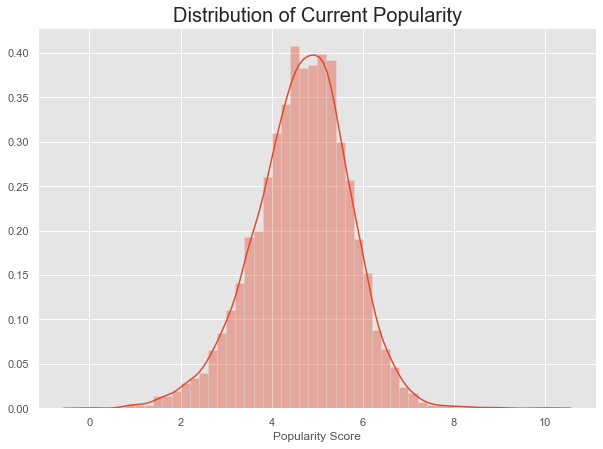

In [81]:
plt.figure(figsize=(10,7))
sns.distplot(df_endurance.curr_pop)
plt.xlabel("Popularity Score",fontsize = 12)
plt.title("Distribution of Current Popularity",fontsize = 20)
plt.show()

In [82]:
df_endurance.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'year_of_release', 'decade_of_release',
       'month_of_release', 'genre_score', 'curr_genre_score',
       'inflated_budget', 'inflated_revenue', 'inflated_profit', 'dur_score',
       'Position', 'Description', 'Name', 's', 'cast_points',
       'production_points', 'Winner', 'old_pop_score', 'curr_pop'],
      dtype='object')

In [83]:
df_endurance['endurance']= 0.65*df_endurance['curr_pop']+0.35*df_endurance['old_pop_score']

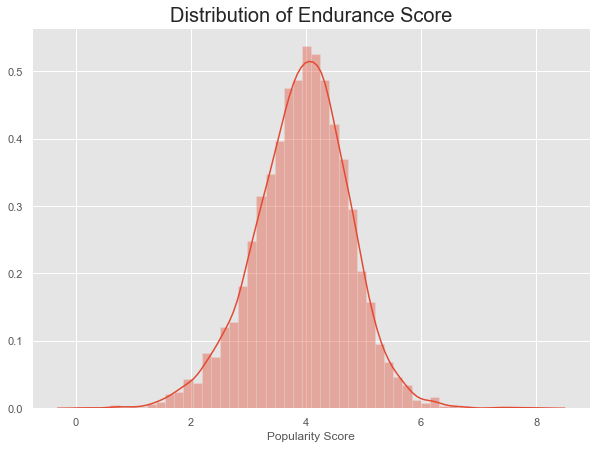

In [84]:
plt.figure(figsize=(10,7))
sns.distplot(df_endurance.endurance)
plt.xlabel("Popularity Score",fontsize = 12)
plt.title("Distribution of Endurance Score",fontsize = 20)
plt.show()

In [85]:
a = df_endurance.nlargest(10, ['endurance'])['original_title'].to_frame()
a

,original_title
2420,Titanic
478,Avatar
2032,The Dark Knight Rises
1261,The Dark Knight
451,Star Wars
937,The Warrior's Way
4,Star Wars: The Force Awakens
728,Inception
15,Avengers: Age of Ultron
5104,The Exorcist


In [86]:
df_endurance[df_endurance['Winner']==0].count()

id                      475
imdb_id                 475
popularity              475
budget                  475
revenue                 475
original_title          475
cast                    475
homepage                148
director                475
tagline                 418
keywords                467
overview                475
runtime                 475
genres                  475
production_companies    475
release_date            475
vote_count              475
vote_average            475
release_year            475
budget_adj              475
revenue_adj             475
year_of_release         475
decade_of_release       475
month_of_release        475
genre_score             475
curr_genre_score        475
inflated_budget         475
inflated_revenue        475
inflated_profit         475
dur_score               475
Position                475
Description             475
Name                    475
s                         0
cast_points             475
production_points   

In [87]:
for x in a.index:
    print(df_endurance.loc[x]['Winner'])

1.0
1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
1.0


In [88]:
X_Columns = ['budget_adj','revenue_adj','genre_score','dur_score']
Y_Columns = ['endurance']
df_unscaled = df_endurance[X_Columns]
Y_unscaled = df_endurance[Y_Columns]
#Y = df_endurance[Y_Columns]

In [89]:
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(df_unscaled)

# Run the normalizer on the dataframe
df = pd.DataFrame(x_scaled)
df.columns = list(df.columns)

In [90]:
df.describe()

,0,1,2,3
count,5196.000000,5196.000000,5196.000000,5196.000000
mean,0.086995,0.036200,0.411507,0.658534
std,0.098851,0.069235,0.175217,0.401399
min,0.000000,0.000000,0.000000,0.000000
25%,0.019064,0.000000,0.290100,0.149763
50%,0.053618,0.010201,0.391405,0.962444
75%,0.118224,0.040198,0.540037,0.993310
max,1.000000,1.000000,1.000000,1.000000


In [91]:
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(Y_unscaled)

# Run the normalizer on the dataframe
Y = pd.DataFrame(x_scaled)
Y.columns = list(Y_unscaled.columns)

In [92]:
Y.describe()

,endurance
count,5196.000000
mean,0.479803
std,0.103326
min,0.000000
25%,0.416845
50%,0.484898
75%,0.547765
max,1.000000


In [93]:
# sklearn libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn import metrics

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.25, random_state=42)

In [95]:
def plot_top_coefficients(model, top_n = 2):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_coefficients = pd.DataFrame(zipped).head(top_n).sort_values(1)
    #bottom_coefficients = pd.DataFrame(zipped).tail(top_n).sort_values(1,ascending=True)
    combined = pd.concat([top_coefficients], axis=0)
    combined.columns = ['Feature', 'Coefficient']
    return top_coefficients

In [96]:
result ={}

# 1) Linear Regression

In [101]:
lm = LinearRegression()
lmPred = lm.fit(X_train,y_train)
predictions = lmPred.predict(X_test)
rms_error = np.sqrt(mean_squared_error((y_test), (predictions)))
result["Linear Regression"] = rms_error
print("RMS Error: "+str(rms_error ))

RMS Error: 0.1032


# 2) Ridge

In [102]:
ridge = Ridge()
raw_ridge = ridge.fit(X_train, y_train)
predictions = raw_ridge.predict(X_test)
rms_error = np.sqrt(mean_squared_error((y_test), (predictions)))
result["Ridge"] = rms_error
print("Ridge RMS Error: "+str(rms_error))

Ridge RMS Error: 0.107


# 3) Lasso

In [103]:
lasso = Lasso()
raw_lasso = lasso.fit(X_train, y_train)
predictions = raw_lasso.predict(X_test)
rms_error = np.sqrt(mean_squared_error((y_test), (predictions)))
result["Lasso"] = rms_error
print("Lasso RMS Error: "+str(np.sqrt(mean_squared_error((y_test), (predictions)))))

Lasso RMS Error: 0.1032


# 4) Ridge CV

In [100]:
alphas = np.logspace(-6,6,20)
ridgecv = RidgeCV(alphas=alphas)
ridgecv = RidgeCV(alphas=alphas)
raw_ridge_cv = ridgecv.fit(X_train, y_train)
predictions = raw_ridge_cv.predict(X_test)
rms_error = np.sqrt(mean_squared_error((y_test), (predictions)))
result["RidgeCV"] = rms_error
print("RidgeCV RMS Error: "+str(rms_error))

RidgeCV RMS Error: 0.0735963199867618


# 5) Lasso CV

In [99]:
lassocv = LassoCV(alphas=alphas)
raw_lasso_cv = lassocv.fit(X_train, y_train)
predictions = lassocv.predict(X_test)
rms_error = np.sqrt(mean_squared_error((y_test), (predictions)))
result["LassoCV"] = rms_error
print("LassoCV RMS Error: "+str(np.sqrt(mean_squared_error((y_test), (predictions)))))

LassoCV RMS Error: 0.07361600802453067


/Users/mvsnbharath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mvsnbharath/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
